# 1. Data preparation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1.1. Data set structure

First step, I want to have an overview about my dataset. There are no missing values, but there is very high variance.

In [2]:
dataset = pd.read_csv('../../data/extracted-features/cli_results.csv')
dataset

,ID,Image,Mask,original_shape_VoxelVolume,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_Sphericity,original_shape_Maximum3DDiameter,original_shape_Maximum2DDiameterSlice,...,lbp-3D-k_gldm_GrayLevelNonUniformity,lbp-3D-k_gldm_GrayLevelVariance,lbp-3D-k_gldm_HighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceEmphasis,lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-3D-k_gldm_LowGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceEmphasis,lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis
0,brain1,/home/manos/git/radiomics-features-extraction/...,/home/manos/git/radiomics-features-extraction/...,16412.658691,16147.511800,6438.821604,0.398750,0.479823,69.600990,53.593978,...,3566.861252,0.068907,1.223350,293.398356,298.803723,292.047015,0.944162,0.020216,0.062005,0.009769
1,breast1,/home/manos/git/radiomics-features-extraction/...,/home/manos/git/radiomics-features-extraction/...,132.425795,124.091305,172.887079,1.393225,0.695904,9.081019,8.399794,...,133.349650,0.033742,1.104895,199.881119,200.405594,199.750000,0.973776,0.015501,0.038811,0.009674
2,brain2,/home/manos/git/radiomics-features-extraction/...,/home/manos/git/radiomics-features-extraction/...,1797.180176,1736.017863,929.760151,0.535571,0.751304,24.444532,16.312979,...,356.355408,0.106672,1.364238,194.677704,206.988962,191.599890,0.908940,0.017346,0.049359,0.009343
3,lung1,/home/manos/git/radiomics-features-extraction/...,/home/manos/git/radiomics-features-extraction/...,1361.197815,1330.976079,782.241458,0.587720,0.748038,21.344947,16.627324,...,727.317802,0.065521,1.211470,263.203106,276.848268,259.791816,0.947133,0.007737,0.015102,0.005896
4,lung2,/home/manos/git/radiomics-features-extraction/...,/home/manos/git/radiomics-features-extraction/...,48434.108762,48292.521605,9537.544880,0.197495,0.672410,68.982471,55.802348,...,17119.980928,0.152654,1.563991,353.020938,404.116986,340.246926,0.859002,0.009814,0.029027,0.005011


In [3]:
dataset.describe()

,original_shape_VoxelVolume,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_Sphericity,original_shape_Maximum3DDiameter,original_shape_Maximum2DDiameterSlice,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_MajorAxisLength,...,lbp-3D-k_gldm_GrayLevelNonUniformity,lbp-3D-k_gldm_GrayLevelVariance,lbp-3D-k_gldm_HighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceEmphasis,lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-3D-k_gldm_LowGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceEmphasis,lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,13627.514248,13526.223730,3572.251034,0.622552,0.669496,38.690792,30.147284,33.012852,34.903805,32.188857,...,4380.773008,0.085499,1.293589,260.836245,277.432707,256.687129,0.926603,0.014123,0.038861,0.007939
std,20565.704381,20511.684428,4187.019951,0.456475,0.111291,28.520164,22.666387,23.740129,26.984225,24.808750,...,7254.897448,0.045583,0.177053,66.438676,82.766940,62.690481,0.044263,0.005214,0.018076,0.002295
min,132.425795,124.091305,172.887079,0.197495,0.479823,9.081019,8.399794,7.121408,8.240911,7.730961,...,133.349650,0.033742,1.104895,194.677704,200.405594,191.599890,0.859002,0.007737,0.015102,0.005011
25%,1361.197815,1330.976079,782.241458,0.398750,0.672410,21.344947,16.312979,19.555666,17.557495,17.374483,...,356.355408,0.065521,1.211470,199.881119,206.988962,199.750000,0.908940,0.009814,0.029027,0.005896
50%,1797.180176,1736.017863,929.760151,0.535571,0.695904,24.444532,16.627324,23.593253,20.728928,18.067154,...,727.317802,0.068907,1.223350,263.203106,276.848268,259.791816,0.944162,0.015501,0.038811,0.009343
75%,16412.658691,16147.511800,6438.821604,0.587720,0.748038,68.982471,53.593978,49.490855,62.102629,55.774466,...,3566.861252,0.106672,1.364238,293.398356,298.803723,292.047015,0.947133,0.017346,0.049359,0.009674
max,48434.108762,48292.521605,9537.544880,1.393225,0.751304,69.600990,55.802348,65.303079,65.889060,61.997220,...,17119.980928,0.152654,1.563991,353.020938,404.116986,340.246926,0.973776,0.020216,0.062005,0.009769


## 1.2. Scale dataset

Remove the unnecessary columns and scale the rest. 

In [4]:
dataset.drop(axis=1, labels=['ID', 'Mask', 'Image'], inplace=True)

In [5]:
columns = dataset.columns

scaled_dataset = pd.DataFrame(StandardScaler().fit_transform(dataset), columns=columns)
scaled_dataset

,original_shape_VoxelVolume,original_shape_MeshVolume,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_Sphericity,original_shape_Maximum3DDiameter,original_shape_Maximum2DDiameterSlice,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_MajorAxisLength,...,lbp-3D-k_gldm_GrayLevelNonUniformity,lbp-3D-k_gldm_GrayLevelVariance,lbp-3D-k_gldm_HighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceEmphasis,lbp-3D-k_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_LargeDependenceLowGrayLevelEmphasis,lbp-3D-k_gldm_LowGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceEmphasis,lbp-3D-k_gldm_SmallDependenceHighGrayLevelEmphasis,lbp-3D-k_gldm_SmallDependenceLowGrayLevelEmphasis
0,0.151412,0.142879,0.765443,-0.548154,-1.905453,1.211727,1.156523,0.776026,1.283808,1.343347,...,-0.125430,-0.406961,-0.443535,0.547957,0.288684,0.630615,0.443535,1.306427,1.431453,0.891441
1,-0.733647,-0.730512,-0.907711,1.887593,0.265294,-1.160748,-1.072709,-1.219350,-1.104720,-1.102222,...,-0.654560,-1.269462,-1.191541,-1.025756,-1.040499,-1.015428,1.191541,0.295481,-0.003068,0.845102
2,-0.643144,-0.642651,-0.705608,-0.213042,0.821851,-0.558475,-0.682386,-0.443613,-0.587306,-0.636410,...,-0.620193,0.519304,0.446129,-1.113320,-0.951570,-1.160778,-0.446129,0.691163,0.649327,0.684217
3,-0.666846,-0.664729,-0.744999,-0.085313,0.789033,-0.679984,-0.666881,-0.633762,-0.718707,-0.667626,...,-0.563025,-0.490017,-0.518558,0.039830,-0.007895,0.055370,0.518558,-1.369188,-1.469473,-0.994806
4,1.892226,1.895013,1.592875,-1.041083,0.029275,1.187480,1.265452,1.520698,1.126925,1.062912,...,1.963207,1.647135,1.707505,1.551289,1.711279,1.490221,-1.707505,-0.923882,-0.608240,-1.425954


# 2. Feature selection

Perform multiple techiques of feature selection in order to compare them.

## 2.1. VarianceThreshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [6]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
VT_dataset = sel.fit_transform(scaled_dataset)
VT_dataset = pd.DataFrame(VT_dataset)
VT_dataset

,0,1,2,3,4,5,6,7,8,9,...,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489
0,0.151412,0.142879,0.765443,-0.548154,-1.905453,1.211727,1.156523,0.776026,1.283808,1.343347,...,-0.125430,-0.406961,-0.443535,0.547957,0.288684,0.630615,0.443535,1.306427,1.431453,0.891441
1,-0.733647,-0.730512,-0.907711,1.887593,0.265294,-1.160748,-1.072709,-1.219350,-1.104720,-1.102222,...,-0.654560,-1.269462,-1.191541,-1.025756,-1.040499,-1.015428,1.191541,0.295481,-0.003068,0.845102
2,-0.643144,-0.642651,-0.705608,-0.213042,0.821851,-0.558475,-0.682386,-0.443613,-0.587306,-0.636410,...,-0.620193,0.519304,0.446129,-1.113320,-0.951570,-1.160778,-0.446129,0.691163,0.649327,0.684217
3,-0.666846,-0.664729,-0.744999,-0.085313,0.789033,-0.679984,-0.666881,-0.633762,-0.718707,-0.667626,...,-0.563025,-0.490017,-0.518558,0.039830,-0.007895,0.055370,0.518558,-1.369188,-1.469473,-0.994806
4,1.892226,1.895013,1.592875,-1.041083,0.029275,1.187480,1.265452,1.520698,1.126925,1.062912,...,1.963207,1.647135,1.707505,1.551289,1.711279,1.490221,-1.707505,-0.923882,-0.608240,-1.425954


# 3. Feature extraction

Perform multiple techiques of feature extraction in order to compare them.

## 3.1. PCA

Perform PCA using the scaled dataset, while preserving 99% of the training set's variance.

In [7]:
pca = PCA(n_components=0.99)
reduced_dataset = pca.fit_transform(scaled_dataset)
reduced_dataset = pd.DataFrame(reduced_dataset)

In [8]:
pca.explained_variance_ratio_

array([0.40058986, 0.35019616, 0.16340625, 0.08580773])

In [9]:
reduced_dataset

,0,1,2,3
0,-25.750887,-19.302559,-9.078808,-15.323076
1,45.881899,-12.302815,-5.599445,-2.632927
2,-13.999970,-17.554078,-2.982042,19.729584
3,-2.245882,7.719390,30.495355,-2.718362
4,-3.885160,41.440062,-12.835061,0.944781


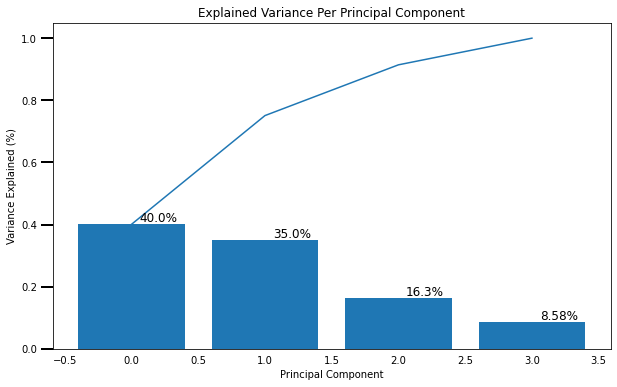

In [10]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components
    
    INPUT: pca = the instance of PCA in scikit learn
    
    OUTPUT: None
    '''
    
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
        
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
    
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
scree_plot(pca)

# Data Visualization

In [11]:
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

similarities = euclidean_distances(dataset)


seed = np.random.RandomState(seed=3)

mds = manifold.MDS(n_components=2, max_iter=5000, eps=1e-12, random_state=seed,
                   n_init=10,
                   dissimilarity="precomputed", n_jobs=1, metric=False)
pos = mds.fit_transform(similarities)

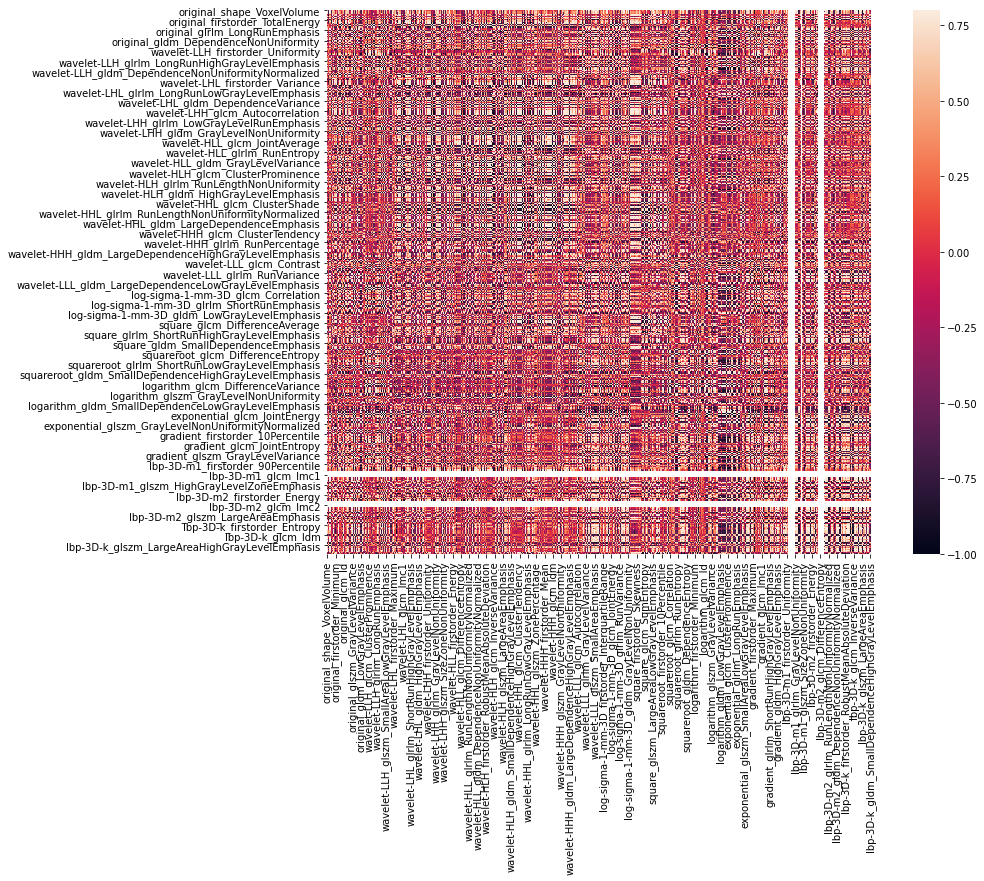

In [13]:
import pandas as pd
import seaborn as sns

# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=dataset, columns=dataset.columns)
corr = d.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True)
plt.show()

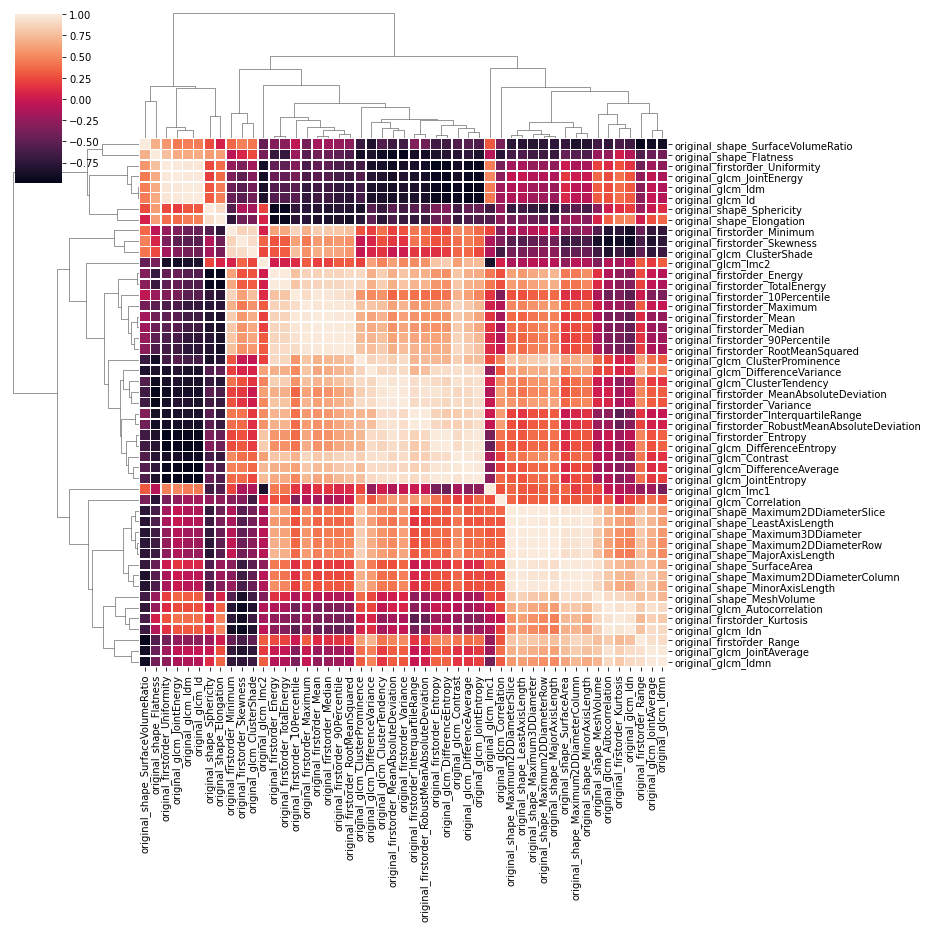

In [14]:
# Choose a subset of features for clustering
dd = d.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()